In [1]:
##########################################################################
# Created on Sat Nov 14 19:45:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

### Defination

$$\mathit{\Delta}=\frac{ \partial \mathit{\Pi} }{ \partial S }\tag{12-1}$$
where,\
$\mathit{\Pi}$:Option price\
$S$:Underlying price

# 12.1.1.Delta of European option

### Mathimatical expression

| Option Type   | Position | Expression                   |
|:-------------:|:--------:|:--------------------------:  |
| European Call | Long     | $$\mathit{\Delta}=N(d_1)$$   |
| European Call | Short    | $$\mathit{\Delta}=-N(d_1)$$  |
| European Put  | Long     | $$\mathit{\Delta}=N(d_1)-1$$ |
| European Put  | Short    | $$\mathit{\Delta}=1-N(d_1)$$ |

### 1.Implementation

In [2]:
def delta_EurOpt(S,K,sigma,r,T,optype,positype):
    '''Define a function to calculate delta of European option.
    S:underlying price
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    optype:type of option. 'call' indicates call option otherwise put option
    positype:type of position. 'long' indicates long position otherwise short position'''
    from scipy.stats import norm
    from numpy import log,sqrt
    
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    if optype=='call':
        if positype=='long':
            delta=norm.cdf(d1)
        else:
            delta=-norm.cdf(d1)
    else:
        if positype=='long':
            delta=norm.cdf(d1)-1
        else:
            delta=1-norm.cdf(d1)
    return delta

### 2.Case study

In [3]:
S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19
shibor_6M=0.02377
T_ABC=0.5

delta_EurOpt1=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='long')
delta_EurOpt2=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='short')
delta_EurOpt3=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='long')
delta_EurOpt4=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='short')

print('Delta of European call option of ABC when long position is',round(delta_EurOpt1,4))
print('Delta of European call option of ABC when short position is',round(delta_EurOpt2,4))
print('Delta of European put option of ABC when long position is',round(delta_EurOpt3,4))
print('Delta of European put option of ABC when short position is',round(delta_EurOpt4,4))

Delta of European call option of ABC when long position is 0.2877
Delta of European call option of ABC when short position is -0.2877
Delta of European put option of ABC when long position is -0.7123
Delta of European put option of ABC when short position is 0.7123


### 3.Approximate calculation using Delta

$$\tilde{ \mathit{\Pi} }\approx \mathit{\Pi}+\mathit{\Delta}\times(\tilde{ S }-S)\tag{12-2}$$
where,\
$\tilde{ \mathit{\Pi} }$:option price after change\
$\tilde{ S }$:underlying price after change

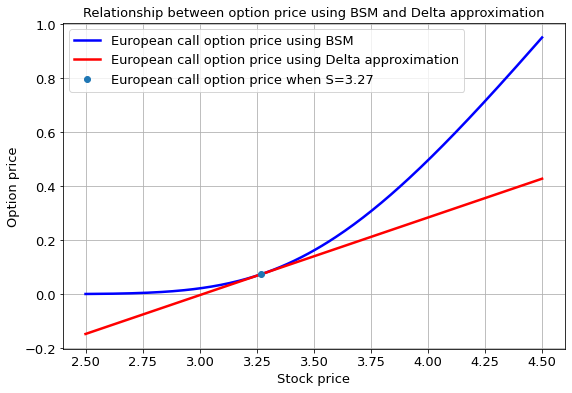

In [4]:
import utils
import matplotlib.pyplot as plt
import numpy as np

S_list1=np.linspace(2.5,4.5,200)

value_list=utils.option_BSM(S=S_list1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call')
value_one=utils.option_BSM(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call')

value_approx1=value_one+delta_EurOpt1*(S_list1-S_ABC)

plt.figure(figsize=(9,6))
plt.plot(S_list1,value_list,'b-',label='European call option price using BSM',lw=2.5)
plt.plot(S_list1,value_approx1,'r-',label='European call option price using Delta approximation',lw=2.5)
plt.plot(S_ABC,value_one,'o',label='European call option price when S=3.27',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Option price',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option price using BSM and Delta approximation',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.1.2.Relationship between underlying price,tenor and Delta

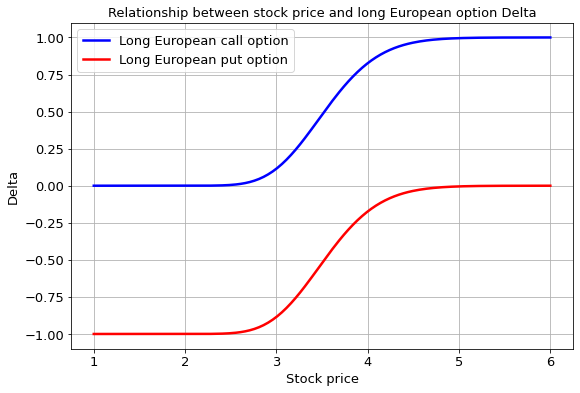

In [5]:
S_list2=np.linspace(1.0,6.0,200)

delta_EurCall=delta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='long')
delta_EurPut=delta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='long')

plt.figure(figsize=(9,6))
plt.plot(S_list2,delta_EurCall,'b-',label='Long European call option',lw=2.5)
plt.plot(S_list2,delta_EurPut,'r-',label='Long European put option',lw=2.5)
plt.xlabel('Stock price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Delta',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between stock price and long European option Delta',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

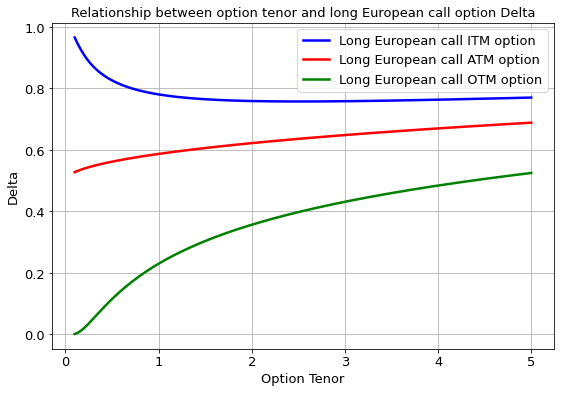

In [6]:
S1=4.0 #In the money call
S2=3.6 #At the money call
S3=3.0 #Out the money call

T_list=np.linspace(0.1,5.0,200)

Delta_list1=delta_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long')
Delta_list2=delta_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long')
Delta_list3=delta_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long')

plt.figure(figsize=(9,6))
plt.plot(T_list,Delta_list1,'b-',label='Long European call ITM option',lw=2.5)
plt.plot(T_list,Delta_list2,'r-',label='Long European call ATM option',lw=2.5)
plt.plot(T_list,Delta_list3,'g-',label='Long European call OTM option',lw=2.5)
plt.xlabel('Option Tenor',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Delta',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between option tenor and long European call option Delta',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

# 12.1.3.Delta based hedging

|Number of Option| Option Type   | Position | Expression                                                |
|:-------------: |:-------------:|:--------:|:-------------------------------------------------------:  |
|N               | European Call | Long     | Short$N\times M\times\mathit{\Delta}$ underlying asset  |
|N               | European Call | Short    | Long$N\times M\times\mathit{\Delta}$ underlying asset   |
|N               | European Put  | Long     | Long$N\times M\times\mathit{\Delta}$ underlying asset   |
|N               | European Put  | Short    | Short$N\times M\times\mathit{\Delta}$ underlying asset  |

In [7]:
#hedging long put position
N_put=1e6 #long put option position
N_ABC=np.abs(delta_EurOpt3*N_put)#stock used for hedging
N_ABC=int(N_ABC)
print('Long number of stocks used for delta hedging is ',N_ABC)

Long number of stocks used for delta hedging is  712254


In [8]:
import datetime as dt

T0=dt.datetime(2020,7,16)#Option initial date(hedging initial date)
T1=dt.datetime(2020,8,31)#Trading date
T2=dt.datetime(2021,1,16)#Option expiration date
T_new=(T2-T1).days/365

S_Aug31=3.21
shibor_Aug31=0.02636

put_Jul16=utils.option_BSM(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='put')
put_Aug31=utils.option_BSM(S=S_Aug31,K=K_ABC,sigma=sigma_ABC,r=shibor_Aug31,T=T_new,opt='put')
print('European put option price at 2020/07/16 is ',round(put_Jul16,4))
print('European put option price at 2020/08/31 is ',round(put_Aug31,4))

European put option price at 2020/07/16 is  0.3613
European put option price at 2020/08/31 is  0.3942


In [9]:
port_chagvalue=N_ABC*(S_Aug31-S_ABC)+N_put*(put_Aug31-put_Jul16)
print('Portfolio P&L at 2020/08/31 based static hedging is ',round(port_chagvalue,2))

Portfolio P&L at 2020/08/31 based static hedging is  -9819.76


In [10]:
delta_Aug31=delta_EurOpt(S=S_Aug31,K=K_ABC,sigma=sigma_ABC,r=shibor_Aug31,T=T_new,optype='put',positype='long')
print('European put option of ABC at 2020/08/31 is ',round(delta_Aug31,4))

European put option of ABC at 2020/08/31 is  -0.7989


In [11]:
N_ABC_new=np.abs(delta_Aug31*N_put)
N_ABC_new=int(N_ABC_new)
print('Long number of stocks used for delta hedging at 2020/08/31 is ',N_ABC_new)

Long number of stocks used for delta hedging at 2020/08/31 is  798913


In [12]:
N_ABC_change=N_ABC_new-N_ABC
print('Change of stock number for delta neutral hedging is ',N_ABC_change)

Change of stock number for delta neutral hedging is  86659


# 12.1.4.Delta of American option

### Defination

$$\mathit{\Delta}=\frac{ \Delta \mathit{\Pi} }{ \Delta S }=\frac{\mathit{\Pi_{1,1}}-\mathit{\Pi_{1,0}}}{S_0u-S_0d}\tag{12-3}$$

### Option value matrix

$$\begin{bmatrix}
\mathit{\Pi} & \mathit{\Pi_{1,1}} & \ldots & \mathit{\Pi_{N-1,N-1}} & \mathit{\Pi_{N,N}} \\
0            & \mathit{\Pi_{1,0}} & \ldots & \mathit{\Pi_{N-1,N-2}} & \mathit{\Pi_{N,N-1}} \\
\vdots       & \vdots             & \ddots & \vdots                 & \vdots             \\
0            & 0                  & \ldots & \mathit{\Pi_{N-1,0}}   & \mathit{\Pi_{N,1}} \\
0            & 0                  & \ldots & 0                      & \mathit{\Pi_{N,0}}
\end{bmatrix}$$

### Implementation

In [13]:
def delta_AmerCall(S,K,sigma,r,T,N,positype):
    '''Define a function to calculate American call option Delta using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model
    positype:type of position. 'long' indicates long position otherwise short position'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(S_end-K,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0)
        call_nostrike=(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])*np.exp(-r*t)
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    Delta=(call_matrix[0,1]-call_matrix[1,1])/(S*u-S*d)
    if positype=='long':
        result=Delta
    else:
        result=-Delta
    
    return result

In [14]:
def delta_AmerPut(S,K,sigma,r,T,N,positype):
    '''Define a function to calculate American put option Delta using N steps binomial tree.
    S:underlying price at t0
    K:strike price
    sigma:volatility of underlying asset return(annualized)
    r:risk free rate(continuous compound)
    T:tenor in year
    N:number of step in the BTM model
    positype:type of position. 'long' indicates long position otherwise short position'''

    import numpy as np
    
    # Step1:Calculate relevant parameters
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    
    # Step2:Calculate the underlying asset price and option value at the option maturity node
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-S_end,0)
    
    #Step3:Calculate the underlying asset price and option value at the non maturity node of the option
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0)
        put_nostrike=(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])*np.exp(-r*t)
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    Delta=(put_matrix[0,1]-put_matrix[1,1])/(S*u-S*d)
    if positype=='long':
        result=Delta
    else:
        result=-Delta
    
    return result

In [15]:
step=100

delta_AmerOpt1=delta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='long')
delta_AmerOpt2=delta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='short')
delta_AmerOpt3=delta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='long')
delta_AmerOpt4=delta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='short')

print('Delta of American call option of ABC when long position is',round(delta_AmerOpt1,4))
print('Delta of American call option of ABC when short position is',round(delta_AmerOpt2,4))
print('Delta of American put option of ABC when long position is',round(delta_AmerOpt3,4))
print('Delta of American put option of ABC when short position is',round(delta_AmerOpt4,4))

Delta of American call option of ABC when long position is 0.2876
Delta of American call option of ABC when short position is -0.2876
Delta of American put option of ABC when long position is -0.7449
Delta of American put option of ABC when short position is 0.7449
